Исследование для сеть фитнес-центров «Культурист-датасаентист».
Задачи проекта:
* научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
* сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
* проанализировать основные признаки, наиболее сильно влияющие на отток;
* сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
1) выделить целевые группы клиентов;
2) предложить меры по снижению оттока;
3) определить другие особенности взаимодействия с клиентами.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings

# Шаг 1. Загрузка данных

In [2]:
fitness = pd.read_csv('/datasets/gym_churn.csv', sep=',')
fitness.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


Приведем название столбцов к нижнему регистру

In [3]:
fitness.columns = fitness.columns.str.lower()

In [4]:
fitness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

Изучив общую информацию о датасете видим:
1. всего 4000 строк в каждом столбце - пропусков нет
2. все типы данных корректны

Ответ студента

In [5]:
fitness[fitness.duplicated()]

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn


Дубликатов в данных нет

# Шаг 2. Исследовательский анализ данных (EDA)

In [6]:
fitness.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


Типичного клиента финтнес-клуба можно охорактеризовать следующим образом:
1. Проживает/работает в районе расположения фитнесс-клуба
2. Возраст - 30 лет
3. Приобретает абонеиент на один месяц
4. Посещает финтесс-клуб на протяжении 3-4 месяцев
5. Тренировки посещает два раза в неделю

Рассмотрим средние занчения признаков в двух группах — тех, кто ушел в отток и тех, кто остался

In [7]:
fitness[fitness['churn'] == 1].describe().T

,count,mean,std,min,25%,50%,75%,max
gender,1061.0,0.510839,0.500118,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,1061.0,0.768143,0.422217,0.000000,1.000000,1.000000,1.000000,1.000000
partner,1061.0,0.355325,0.478837,0.000000,0.000000,0.000000,1.000000,1.000000
promo_friends,1061.0,0.183789,0.387495,0.000000,0.000000,0.000000,0.000000,1.000000
phone,1061.0,0.902922,0.296204,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,1061.0,1.728558,2.132371,1.000000,1.000000,1.000000,1.000000,12.000000
group_visits,1061.0,0.268615,0.443448,0.000000,0.000000,0.000000,1.000000,1.000000
age,1061.0,26.989632,2.895163,18.000000,25.000000,27.000000,29.000000,38.000000
avg_additional_charges_total,1061.0,115.082899,77.696419,0.148205,50.629127,103.814686,165.616858,425.535220
month_to_end_contract,1061.0,1.662582,1.964593,1.000000,1.000000,1.000000,1.000000,12.000000


In [8]:
fitness[fitness['churn'] == 0].describe().T

,count,mean,std,min,25%,50%,75%,max
gender,2939.0,0.510037,0.499984,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,2939.0,0.873086,0.332933,0.000000,1.000000,1.000000,1.000000,1.000000
partner,2939.0,0.534195,0.498914,0.000000,0.000000,1.000000,1.000000,1.000000
promo_friends,2939.0,0.353522,0.478144,0.000000,0.000000,0.000000,1.000000,1.000000
phone,2939.0,0.903709,0.295040,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,2939.0,5.747193,4.716942,1.000000,1.000000,6.000000,12.000000,12.000000
group_visits,2939.0,0.464103,0.498795,0.000000,0.000000,0.000000,1.000000,1.000000
age,2939.0,29.976523,3.009933,19.000000,28.000000,30.000000,32.000000,41.000000
avg_additional_charges_total,2939.0,158.445715,99.801599,0.171862,76.920993,149.881171,224.448274,552.590740
month_to_end_contract,2939.0,5.283089,4.363522,1.000000,1.000000,6.000000,10.000000,12.000000


In [9]:
display(fitness.groupby('churn').agg('mean'))

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


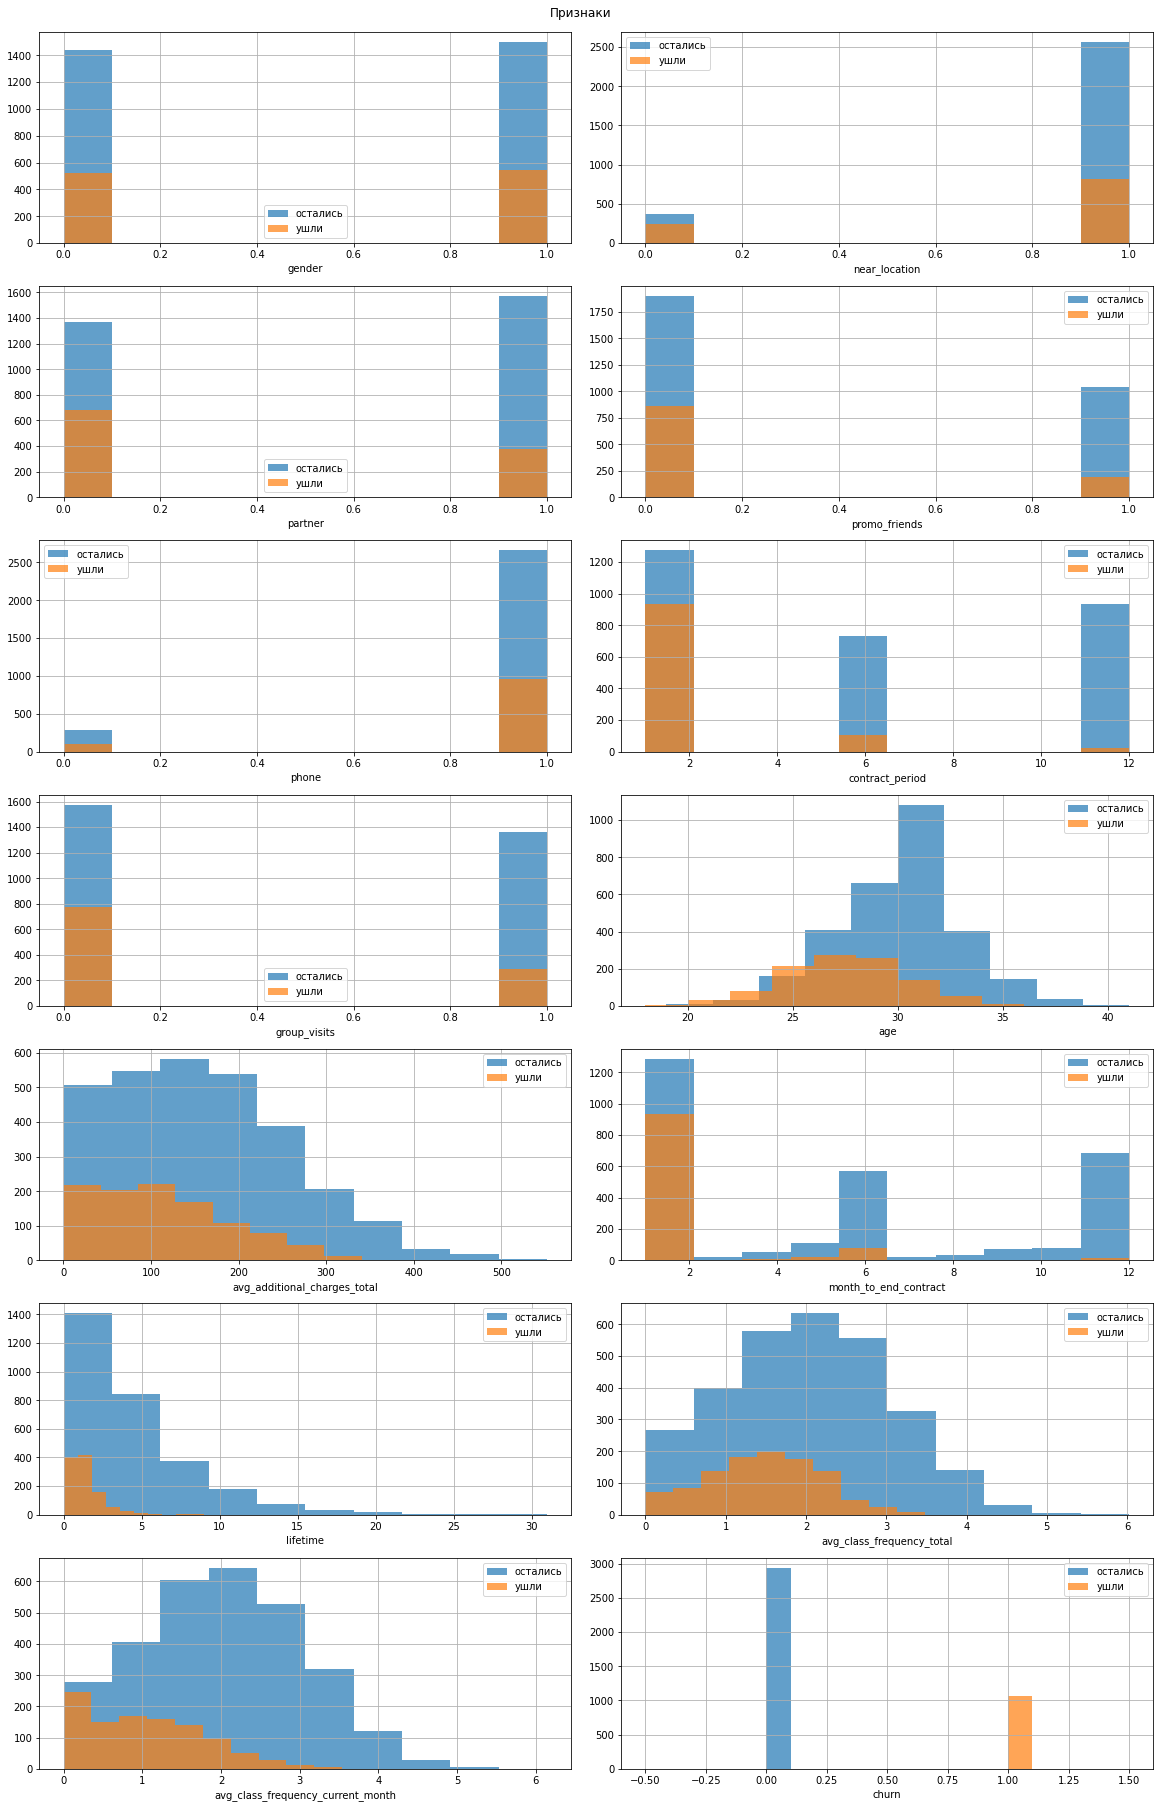

In [10]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(16, 25), constrained_layout=True)

for col, col_name in enumerate(fitness):
    fitness.query('churn == 0')[col_name].hist(alpha=0.7, label='остались', ax=axes[col // 2, col % 2])
    fitness.query('churn == 1')[col_name].hist(alpha=0.7, label='ушли', ax=axes[col // 2, col % 2])
    axes[col // 2, col % 2].set_xlabel(col_name)
    axes[col // 2, col % 2].legend() 
fig.suptitle('Признаки');

In [11]:
fitness.corr()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
near_location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


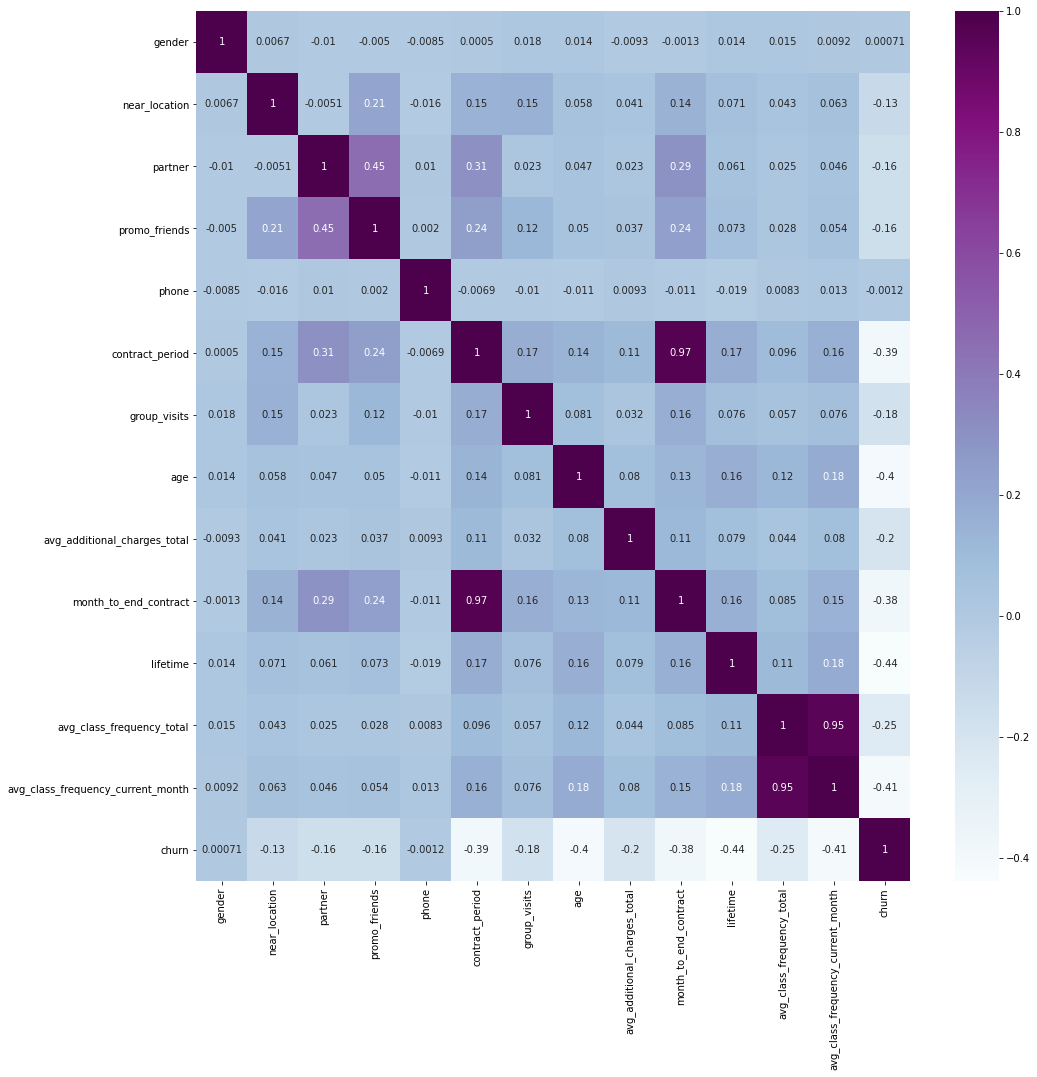

In [12]:
plt.figure(figsize=(16,16))
sns.heatmap(fitness.corr(), annot=True, cmap="BuPu");

На основании проведенного анализа можно сделать следующие выводы по оттоку клиентов, чаще всего это:
1. клиент не проживает/работает в районе расположения фитнес-клуба
2. клиент не работает в компании-парнере
3. клиент не пользовался акцией "приведи друга"
4. клиент не посещал групповые тренировки
5. клиенты чаще приобретающие абонемент на срок не более одного месяца
6. клиенты поскясющие фитнес-центер не чаще одного - двух раз в неделю

In [13]:
fitness = fitness.drop(columns=['contract_period', 'avg_class_frequency_current_month'])

# Шаг 3. Модель прогнозирования оттока клиентов

Разобьем данные на обучающую и валидационную выборку

In [14]:
X = fitness.drop(columns=['churn'])
y = fitness['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)

Обучим модель и определим лучшую модель

In [16]:
models = [
    LogisticRegression(random_state=0),
    RandomForestClassifier(random_state=0)
]

def make_prediction(m, X_train, y_train, X_test, y_test):
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(
        'Accuracy:{:.2f} Precision:{:.2f} Recall:{:.2f}'.format(
            accuracy_score(y_test, y_pred),
            precision_score(y_test, y_pred),
            recall_score(y_test, y_pred),
        )
    )

In [17]:
for i in models:
    print(i)
    make_prediction(
        m=i,
        X_train=X_train_st,
        y_train=y_train,
        X_test=X_test_st,
        y_test=y_test,
    )

LogisticRegression(random_state=0)
Accuracy:0.90 Precision:0.78 Recall:0.81
RandomForestClassifier(random_state=0)
Accuracy:0.90 Precision:0.80 Recall:0.77


Обе модели показывают хорошую долю правильных ответов - 90% на логистичской регрессии и 90% случайным лесом. Лучше себя показала логистическая регрессия.

# Шаг 4. Кластеризация клиентов

Стандартизируем данные

In [18]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

linked = linkage(X_sc, method = 'ward') 

Нарисуем дендрограмму

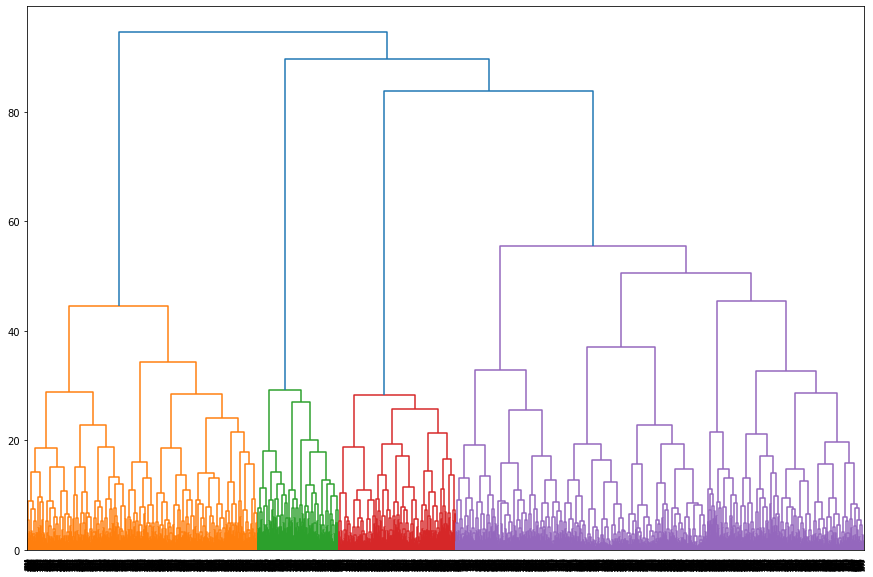

In [19]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.show() 

Из полученного графика видим, что можно выделить четыре кластера. Но так как четверный кластер довольно большой, выборку можно разделить на пять кластеров. Далее можно запустить более быстрый алгоритм K-Means

Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов

In [20]:
KM = KMeans(n_clusters = 5, random_state=0) 
labels = KM.fit_predict(X_sc)

Посмотрим на средние значения признаков для кластеров

In [21]:
fitness['cluster'] = labels
fitness.groupby('cluster').agg('mean')

,gender,near_location,partner,promo_friends,phone,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,churn
cluster,,,,,,,,,,,,
0,0.498501,0.995005,0.889111,1.000000,1.0,0.519481,29.543457,152.139417,6.265734,4.210789,1.951909,0.132867
1,0.500898,0.000000,0.488330,0.077199,1.0,0.231598,28.685817,137.277472,2.804309,2.978456,1.762672,0.402154
2,0.521158,0.995546,0.417595,0.011136,1.0,0.546771,30.805122,177.103564,6.162584,5.701559,2.318701,0.016704
3,0.512090,1.000000,0.196891,0.053541,1.0,0.297064,27.818653,124.625600,1.898964,2.058722,1.539284,0.506045
4,0.523316,0.862694,0.471503,0.305699,0.0,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,0.266839


На основании анализа данных можно сделать следующие выводы:
1. 1-кластер: у клиентв длительные сроки абонементов, большая доля клиентов является сотруднимами компаний-партнеров большая доля клиентов являются работниками партнеров, самый низкий процент оттока
2. 2-кластер: клиенты  не указывают в анкете контактный номер телефона, так же предпочитаю приобретать абонементы на более длительный период, отток составляет 26%
3. 3-кластер: клиент не живет/работает в непосредственной близости от фитнесс-центра,  не ипольльзовали промо акцию при первом посещении фитнесс-клуба, посещают заняти не чаще двух раз в неделю, отток составляет 44%
4. 4-кластер: клиент живет/работает в непосредственной близости от клуба, приобретает абонемент на короткий срок,  посещают клуб не чаще одного раза в неделю, сымый высокий процент оттока (51%)
5. 5-кластер: клиент приобретает абонимент на короткий срок, больше тратит на дополнительные услуги клуба, чаще посящают фитнесс-клуб, отток составляет 6%

Построим распределения признаков для кластеров

In [22]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

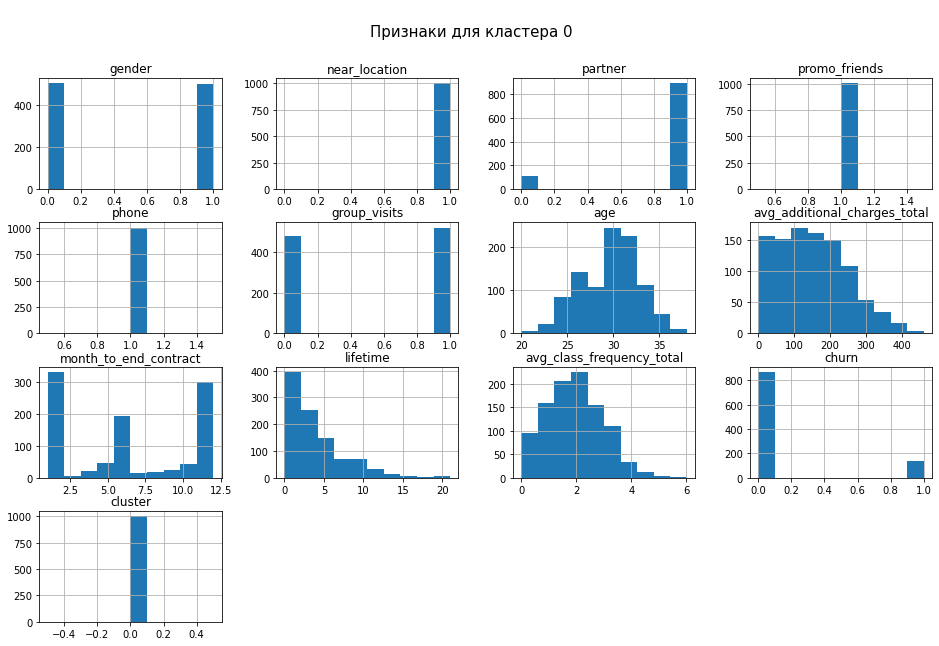

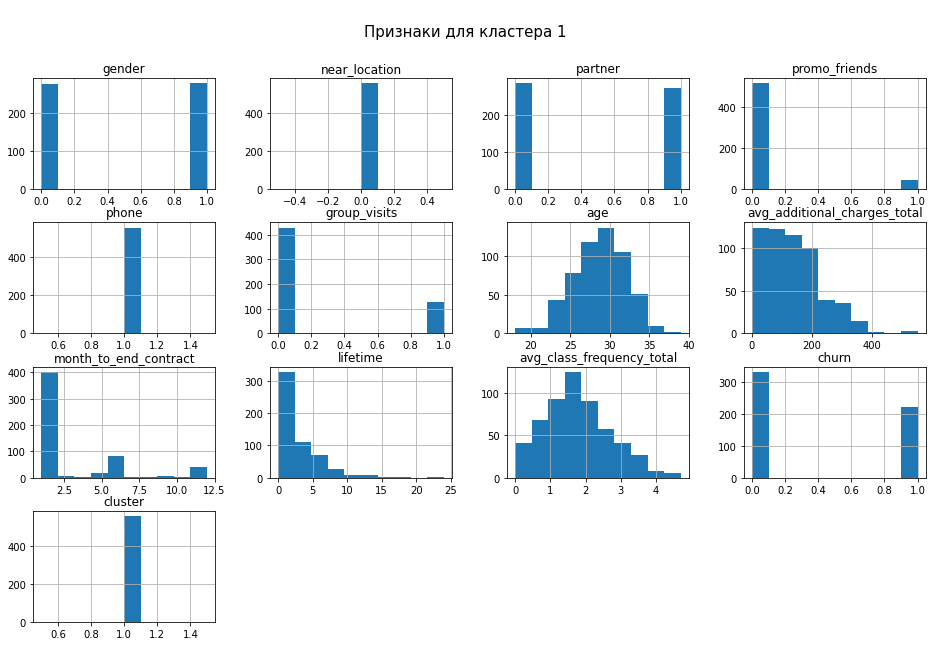

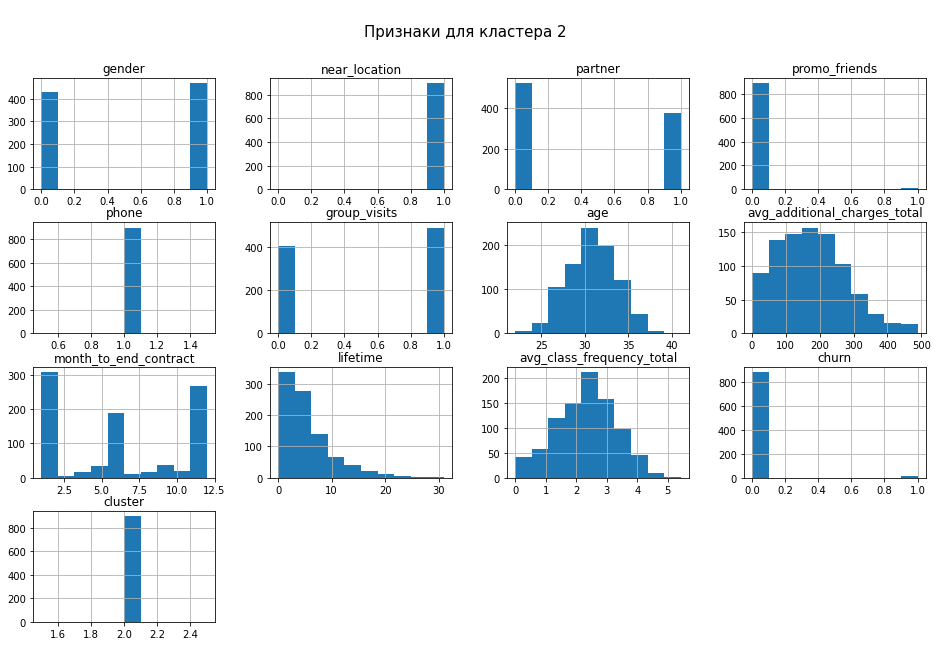

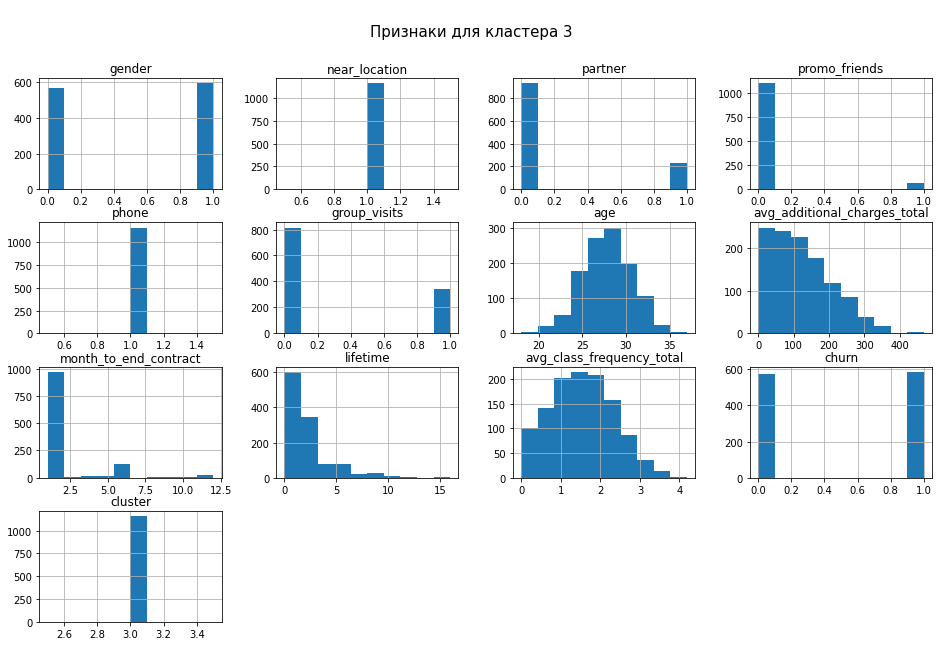

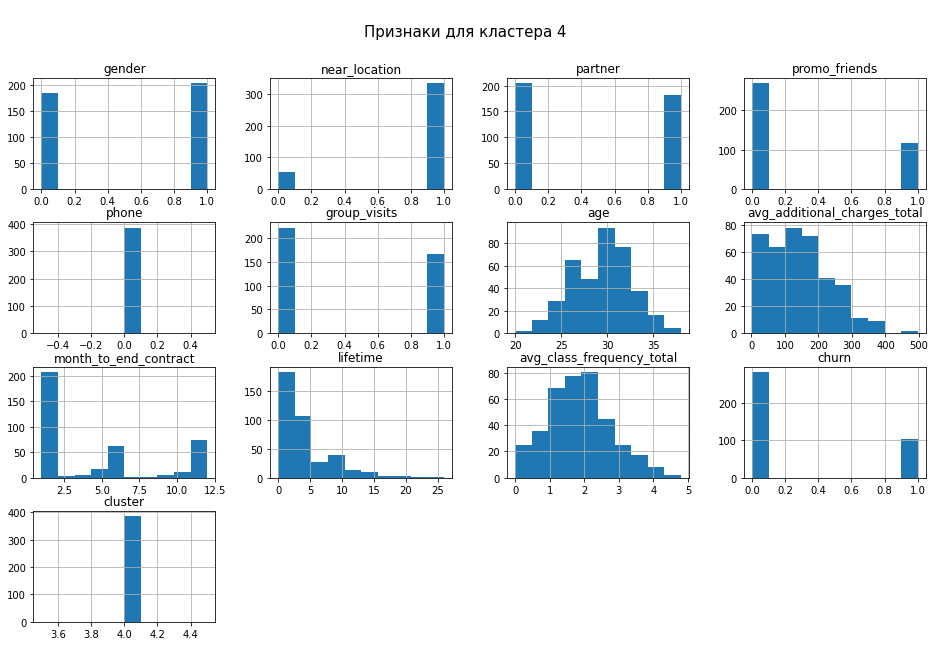

In [23]:
for value in [0, 1, 2, 3, 4,]:
    fitness[fitness['cluster']==value].hist(figsize=(16,10))
    plt.suptitle('\nПризнаки для кластера {}'.format(value), fontsize = 15)
    plt.show()

На основании анализа распределения признаков для кластеров можно подтвердить уже полученные выводы из предыдущего пункта исследования

Доля оттока для каждого кластера

In [24]:
share = fitness.groupby('cluster')['churn'].agg('sum') / fitness.groupby('cluster')['churn'].size()
display(share)

cluster
0    0.132867
1    0.402154
2    0.016704
3    0.506045
4    0.266839
Name: churn, dtype: float64

Клиенты кластеров 2 и 4 более склонны к оттоку, самыми стабильными являеются клиенты из кластеров 1 и 3

# Общие выводы и рекомендации 

В проекте был проведен анализ данных о клиентах сети фитнес-центров «Культурист-датасаентист»

На основании проведденого исследования возможно разделить клиентнов на следующие группы
1. клиенты с низкой вероятностью оттока: живут или работают около клуба, большинство пришло от компании-партнера, пришли по рекомендации друзей и акции "Приведи друга", довольно долго являются членами клуба. 
2. клиенты с высокой вероятностью оттока: живут или работают не в районе расположения фитнесс-клуба, пришли в клуб не по промо акции, редко посещают групповые занятия, посещают клуб с реднем уже в течении трех месяцев
3. клиенты наибольшей вероятность оттока: недавно впервые посетили клуб, при первом посещении не использовали промо акцию, мало тратят на дополнительные услуги клуба, редко посещают групповые тернировки, приобретают абонементы на короткий срок

Так же можно выделить факторы влияющие на отток клинтов:
1. Клиент не живет или работает в районе расположения финтнесс-клуба
2. Клиент не пришел в клуб по акции "Приведи друга"
3. Клиент начал недавно посещать клуб

На основании проведенного исследования можно дать следующие рекомендации:
1. добавить больше интересных групповых тренировок
2. добавить промо-акции для привлечения большего количества клиентов
3. проверить уровень качества предоставления дополнительных услуг